In [38]:
import osmnx as ox
import pandas as pd
import geocoder
from geopy.geocoders import Nominatim
import folium
from folium.plugins import MarkerCluster
import streamlit as st
from streamlit_folium import folium_static
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings('ignore')

In [2]:
price_today= pd.read_excel('price_today.xlsx')
df_acum= pd.read_excel('df_definitivo.xlsx')

In [43]:
#poner aqui la funcio buena. esta no sirve en el mapa

geolocator = Nominatim(user_agent="My-App")

location = geolocator.geocode("Calle Juan Ramon jimenez, 15, Madrid") 

print((location.latitude, location.longitude))

(40.5131528, -3.3530353952466294)


In [48]:
type(location)

geopy.location.Location

In [49]:
diccionario={'REPSOL': 'REPSOL.png', 'CEPSA': 'CEPSA.png'}
diccionario


{'REPSOL': 'REPSOL.png', 'CEPSA': 'CEPSA.png'}

In [50]:
price_today = price_today.sort_values('Distance')
price_head=price_today.head(10)
price_head

,Provincia,Municipio,Localidad,Código postal,Dirección,Longitud,Latitud,Precio gasolina 95 E5,Precio gasolina 95 E5 Premium,Precio gasolina 98 E5,Precio gasóleo A,Precio gasóleo Premium,Rótulo,Horario,Fecha de extracción,Latitud_partida,Longitud_partida,mercator_start,mercator_finish,Distance
6717,MADRID,Madrid,MADRID,28029,"CL MONFORTE DE LEMOS, 7",-3.691194,40.477556,1.879,"1,959","2,011",1.909,"1,989",CEPSA,L-D: 07:00-23:00,27-04-2022,40.485146,-3.684552,POINT (4506785.804015489 -410445.4916140108),POINT (4505940.922476215 -411186.3653054542),1123.707543
6647,MADRID,Madrid,MADRID,28046,"CL PASEO CASTELLANA, 276",-3.686333,40.474833,1.879,No disponible,"1,999",1.909,"1,999",REPSOL,L-D: 24H,27-04-2022,40.485146,-3.684552,POINT (4506785.804015489 -410445.4916140108),POINT (4505637.799502784 -410644.1178619877),1165.060834
6716,MADRID,Madrid,MADRID,28029,"AVENIDA MONFORTE DE LEMOS, 10",-3.697889,40.479861,1.879,No disponible,No disponible,1.899,"1,949",REPSOL,L-V: 07:00-22:00; S: 09:00-15:00,27-04-2022,40.485146,-3.684552,POINT (4506785.804015489 -410445.4916140108),POINT (4506197.513902494 -411933.2014001492),1599.801758
6691,MADRID,Madrid,MADRID,28036,"AVENIDA PÍO XII, 98",-3.675528,40.472556,1.879,No disponible,"1,999",1.909,"1,999",REPSOL,L-D: 24H,27-04-2022,40.485146,-3.684552,POINT (4506785.804015489 -410445.4916140108),POINT (4505384.325022249 -409438.8242909524),1725.549903
6730,MADRID,Madrid,MADRID,28034,"CALLE CARDENAL HERRERA ORIA, 81",-3.700583,40.489056,1.879,No disponible,"2,019",1.899,"1,979",SHELL,L-D: 24H,27-04-2022,40.485146,-3.684552,POINT (4506785.804015489 -410445.4916140108),POINT (4507221.096620337 -412233.7222499723),1840.447896
6728,MADRID,Madrid,MADRID,28034,"CL NUESTRA SEÑORA DE VALVERDE, 175",-3.685333,40.503444,1.859,No disponible,"1,989",1.899,"1,969",REPSOL,L-D: 06:00-22:00,27-04-2022,40.485146,-3.684552,POINT (4506785.804015489 -410445.4916140108),POINT (4508822.761453873 -410532.5676344641),2038.817755
6690,MADRID,Madrid,MADRID,28036,"CL MATEO INURRIA, 4",-3.685750,40.466667,1.879,"1,929","2,029",1.909,"1,999",REPSOL,L-D: 24H,27-04-2022,40.485146,-3.684552,POINT (4506785.804015489 -410445.4916140108),POINT (4504728.764540968 -410579.0840640963),2061.372927
6726,MADRID,Madrid,MADRID,28034,"CARRETERA COLMENAR VIEJO KM. 10,5",-3.697806,40.499500,1.870,No disponible,"2,010",1.900,"1,980",REPSOL,L-D: 24H,27-04-2022,40.485146,-3.684552,POINT (4506785.804015489 -410445.4916140108),POINT (4508383.717382183 -411923.9426059921),2176.957616
6703,MADRID,Madrid,MADRID,28050,"AVENIDA MANOTERAS, 34",-3.665083,40.487861,1.879,No disponible,"2,059",1.899,"1,999",CEPSA,L-D: 06:00-23:59,27-04-2022,40.485146,-3.684552,POINT (4506785.804015489 -410445.4916140108),POINT (4507088.06982884 -408273.702460632),2192.722679
6727,MADRID,Madrid,MADRID,28034,"CARRETERA COLMENAR VIEJO KM. 10,5",-3.697972,40.500000,1.870,No disponible,No disponible,1.900,"1,980",REPSOL,L-D: 24H,27-04-2022,40.485146,-3.684552,POINT (4506785.804015489 -410445.4916140108),POINT (4508439.377127579 -411942.460195173),2230.519888


In [51]:
mapa_loop = folium.Map(location=[40.546376,-3.638541], zoom_start=15)

#marker_cluster = MarkerCluster().add_to(mapa_loop)

def ubi_gasolinera(price_head):
    for i in range(0,len(price_head)):
        html=f"""
            <div style="font-family: arial; color: black">
            <h><b> {price_head.iloc[i]['Rótulo']}</h></b>
            <p>Prices:</p>
                <li> Gasolina 95:{price_head.iloc[i]['Precio gasolina 95 E5']} €</li>
                <li> Diésel:{price_head.iloc[i]['Precio gasóleo A']} €</li>
            <p><b>Dirección:</b></p>
            <p>{price_head.iloc[i]['Dirección']}</p>
            </ul> 
            </p>
            <img src="my_plot_name.png">
            <p>And that's a <a href="https://www.python-graph-gallery.com">link</a></p></div>
            """
        
        iframe = folium.IFrame(html=html, width=200, height=200)
        popup = folium.Popup(iframe, max_width=2650)
        
        folium.Marker(
                location=[price_head.iloc[i]['Latitud'],price_head.iloc[i]['Longitud']],
                popup=popup,
                icon=folium.Icon(color="green",  icon="ok-sign"),
        ).add_to(mapa_loop)
        
    return mapa_loop

def ubi_actual(price_head):
    html=f"""
        <div style="font-family: times new roman; color: green">
        <h><b> Actualmente te encuentras aquí </b></h></div>
        """
    iframe = folium.IFrame(html=html, width=150, height=60)
    popup = folium.Popup(iframe, max_width=2650)
    folium.Marker(
        location=[price_head.iloc[0]['Latitud_partida'],price_head.iloc[0]['Longitud_partida']],
        popup=popup,
        icon=folium.Icon(color="cadetblue",  icon="home"),
).add_to(mapa_loop)  
    return mapa_loop
    
ubi_gasolinera(price_head)
ubi_actual(price_head)

2022-04-27 20:58:47.815 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2022-04-27 20:58:47.816 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2022-04-27 20:58:47.820 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2022-04-27 20:58:47.824 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


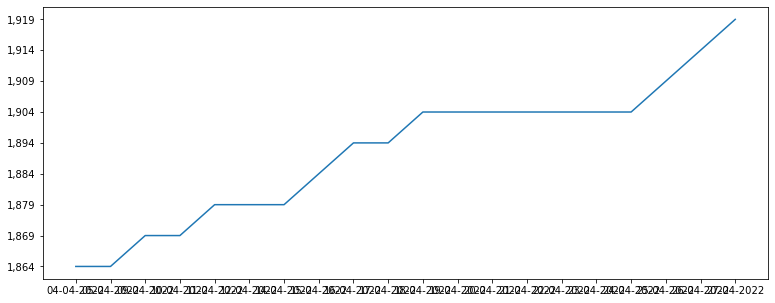

In [52]:
df_grafico=[]
direccion_gasolineras=list(price_head['Dirección'].unique())
for i in direccion_gasolineras:
    df_grafico.append(df_acum[df_acum.Dirección.isin([i])])
df_grafico[0]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(13,5))
x= df_grafico[0]['Fecha de extracción']
y= df_grafico[0] ['Precio gasolina 95 E5'].sort_values()

ax.plot(x,y)
plt.show()
fig.savefig("my_plot_name.png")

In [53]:
# introducir imagen con html para meter el grafico en la etiqueta.
#https://python-graph-gallery.com/312-add-markers-on-folium-map

In [54]:
#st.title('Map of Gas')

In [55]:
#folium_static(mapa_loop)

In [56]:
#mapa_loop.py

In [57]:
def statistical_quartiles(dataset, column, percentile):
    lst = dataset[column].tolist()
    data = sorted(lst)
    if percentile != 100:
        index = int((len(data))*percentile/100)
        #Par, si el resto es 0.  
        if len(lst) % 2 != 0:
            return data[index]

        #Impar, si el resto != de 0.
        else:
            return (data[index - 1] + data[index]) / 2
        
    elif percentile == 100:
        index = int(len(data))-1  
        return data[index]
    
df_colores = price_head.iloc[:,[7,10]]
df_colores

,Precio gasolina 95 E5,Precio gasóleo A
6717,1.879,1.909
6647,1.879,1.909
6716,1.879,1.899
6691,1.879,1.909
6730,1.879,1.899
6728,1.859,1.899
6690,1.879,1.909
6726,1.870,1.900
6703,1.879,1.899
6727,1.870,1.900


In [58]:
df_colores['Precio gasolina 95 E5'] = df_colores['Precio gasolina 95 E5'].apply(lambda x: x.replace(',','.'))
df_colores['Precio gasóleo A'] = df_colores['Precio gasóleo A'].apply(lambda x: x.replace(',','.'))
df_colores['Precio gasolina 95 E5']=df_colores['Precio gasolina 95 E5'].astype('float64')
df_colores['Precio gasóleo A']=df_colores['Precio gasóleo A'].astype('float64')


percentil_50=statistical_quartiles(df_colores,'Precio gasolina 95 E5', 50) #amarillo
percentil_75=statistical_quartiles(df_colores,'Precio gasolina 95 E5', 75) #rojo
percentil_25=statistical_quartiles(df_colores,'Precio gasolina 95 E5', 25) #verde


In [59]:

price_head['Precio gasolina 95 E5'] = price_head['Precio gasolina 95 E5'].apply(lambda x: x.replace(',','.'))
price_head['Precio gasóleo A'] = price_head['Precio gasóleo A'].apply(lambda x: x.replace(',','.'))

price_head['Precio gasóleo A']=price_head['Precio gasóleo A'].astype('float64')
price_head['Precio gasolina 95 E5']=price_head['Precio gasolina 95 E5'].astype('float64')

In [60]:
bins = [0,percentil_25,percentil_75,100]
colores = ['verde','amarillo','rojo']
price_head['Colores']= pd.cut(price_head['Precio gasolina 95 E5'],bins,labels = colores)

In [61]:
mapa_loop = folium.Map(location=[40.546376,-3.638541], zoom_start=15)

#marker_cluster = MarkerCluster().add_to(mapa_loop)

def ubi_gasolinera(price_head):
    for i in range(0,len(price_head)):
        html=f"""
            <div style="font-family: arial; color: black">
            <h><b> {price_head.iloc[i]['Rótulo']}</h></b>
            <p>Prices:</p>
                <li> Gasolina 95:{price_head.iloc[i]['Precio gasolina 95 E5']} €</li>
                <li> Diésel:{price_head.iloc[i]['Precio gasóleo A']} €</li>
            <p><b>Dirección:</b></p>
            <p>{price_head.iloc[i]['Dirección']}</p>
            </ul> 
            </p>
            <img src="my_plot_name.png">
            <p>And that's a <a href="https://www.python-graph-gallery.com">link</a></p></div>
            """
        
        iframe = folium.IFrame(html=html, width=200, height=200)
        popup = folium.Popup(iframe, max_width=2650)
        
        if price_head.iloc[i]['Colores']== 'verde':
            folium.Marker(
                location=[price_head.iloc[i]['Latitud'],price_head.iloc[i]['Longitud']],
                popup=popup,
                icon=folium.Icon(color="green",  icon="ok-sign"),
            ).add_to(mapa_loop)
        elif price_head.iloc[i]['Colores']== 'amarillo':
            folium.Marker(
                location=[price_head.iloc[i]['Latitud'],price_head.iloc[i]['Longitud']],
                popup=popup,
                icon=folium.Icon(color="blue",  icon="ok-sign"),
            ).add_to(mapa_loop)
            
        elif price_head.iloc[i]['Colores']== 'rojo':
            folium.Marker(
                location=[price_head.iloc[i]['Latitud'],price_head.iloc[i]['Longitud']],
                popup=popup,
                icon=folium.Icon(color="red",  icon="ok-sign"),
            ).add_to(mapa_loop)
            
    return mapa_loop

def ubi_actual(price_head):
    html=f"""
        <div style="font-family: times new roman; color: green">
        <h><b> Actualmente te encuentras aquí </b></h></div>
        """
    iframe = folium.IFrame(html=html, width=150, height=60)
    popup = folium.Popup(iframe, max_width=2650)
    folium.Marker(
        location=[price_head.iloc[0]['Latitud_partida'],price_head.iloc[0]['Longitud_partida']],
        popup=popup,
        icon=folium.Icon(color="cadetblue",  icon="home"),
).add_to(mapa_loop)  
    return mapa_loop
    
ubi_gasolinera(price_head)
ubi_actual(price_head)

## Forecasting with prophet